In [141]:
import pandas as pd

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [142]:
data = pd.read_csv("ratings.csv")

In [143]:
data.head()

userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [145]:
data_new = data.groupby(['userId'])['movieId'].apply(list)
data_new = data_new.index.to_frame(name='userId').join(data_new)
data_new = data_new.reset_index(drop=True)
data_new

userId                                            movieId
0         1  [31, 1029, 1061, 1129, 1172, 1263, 1287, 1293,...
1         2  [10, 17, 39, 47, 50, 52, 62, 110, 144, 150, 15...
2         3  [60, 110, 247, 267, 296, 318, 355, 356, 377, 5...
3         4  [10, 34, 112, 141, 153, 173, 185, 260, 289, 29...
4         5  [3, 39, 104, 141, 150, 231, 277, 344, 356, 364...
..      ...                                                ...
666     667  [6, 11, 16, 17, 21, 25, 32, 36, 41, 58, 82, 95...
667     668  [296, 318, 593, 608, 720, 1089, 1213, 1221, 12...
668     669  [223, 260, 381, 480, 785, 913, 968, 1135, 1210...
669     670  [1, 25, 32, 34, 36, 47, 50, 110, 150, 318, 457...
670     671  [1, 36, 50, 230, 260, 296, 318, 356, 357, 432,...

[671 rows x 2 columns]

In [146]:
data_new = pd.DataFrame(data_new.movieId.values.tolist(), data_new.index)
data_new

0     1     2     3     4     5     6     7     8     9     ...  2381  \
0      31  1029  1061  1129  1172  1263  1287  1293  1339  1343  ...   NaN   
1      10    17    39    47    50    52    62   110   144   150  ...   NaN   
2      60   110   247   267   296   318   355   356   377   527  ...   NaN   
3      10    34   112   141   153   173   185   260   289   296  ...   NaN   
4       3    39   104   141   150   231   277   344   356   364  ...   NaN   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
666     6    11    16    17    21    25    32    36    41    58  ...   NaN   
667   296   318   593   608   720  1089  1213  1221  1233  1358  ...   NaN   
668   223   260   381   480   785   913   968  1135  1210  1304  ...   NaN   
669     1    25    32    34    36    47    50   110   150   318  ...   NaN   
670     1    36    50   230   260   296   318   356   357   432  ...   NaN   

     2382  2383  2384  2385  2386  2387  2388  2389  2390  
0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
666   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
667   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
668   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
669   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
670   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[671 rows x 2391 columns]

In [147]:
records = []
num_rows = data_new.shape[0]
num_cols = data_new.shape[1]
for i in range(num_rows):
    this_row = []
    for j in range(num_cols):
        this_row.append(str(data_new.iloc[i,j]))
    ## add this row to records
    records.append(this_row)

In [148]:
records[0]

['31',
 '1029',
 '1061',
 '1129',
 '1172',
 '1263',
 '1287',
 '1293',
 '1339',
 '1343',
 '1371',
 '1405',
 '1953',
 '2105',
 '2150',
 '2193',
 '2294',
 '2455',
 '2968',
 '3671',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan'

In [149]:
records[1]

['10',
 '17',
 '39',
 '47',
 '50',
 '52',
 '62',
 '110',
 '144',
 '150',
 '153',
 '161',
 '165',
 '168',
 '185',
 '186',
 '208',
 '222',
 '223',
 '225',
 '235.0',
 '248.0',
 '253.0',
 '261.0',
 '265.0',
 '266.0',
 '272.0',
 '273.0',
 '292.0',
 '296.0',
 '300.0',
 '314.0',
 '317.0',
 '319.0',
 '339.0',
 '349.0',
 '350.0',
 '356.0',
 '357.0',
 '364.0',
 '367.0',
 '370.0',
 '371.0',
 '372.0',
 '377.0',
 '382.0',
 '405.0',
 '410.0',
 '454.0',
 '457.0',
 '468.0',
 '474.0',
 '480.0',
 '485.0',
 '497.0',
 '500.0',
 '508.0',
 '509.0',
 '515.0',
 '527.0',
 '537.0',
 '539.0',
 '550.0',
 '551.0',
 '552.0',
 '585.0',
 '586.0',
 '587.0',
 '588.0',
 '589.0',
 '590.0',
 '592.0',
 '593.0',
 '616.0',
 '661.0',
 '720.0',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',

In [150]:
from mlxtend.preprocessing import TransactionEncoder

In [151]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)

In [152]:
te_ary

array([[False, False, False, ..., False, False,  True],
       [False,  True, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       ...,
       [False, False, False, ..., False, False,  True],
       [ True, False, False, ..., False, False,  True],
       [ True, False, False, ..., False, False,  True]])

In [153]:
te.columns_

['1',
 '10',
 '100',
 '100.0',
 '100017.0',
 '100032.0',
 '100034.0',
 '100083.0',
 '100106.0',
 '100159.0',
 '100163.0',
 '100226.0',
 '100272.0',
 '1003.0',
 '100304.0',
 '100306.0',
 '100326.0',
 '100365.0',
 '100383.0',
 '100390.0',
 '1004.0',
 '100450.0',
 '100487.0',
 '100498.0',
 '1005',
 '1005.0',
 '100517.0',
 '100527.0',
 '100553.0',
 '100556.0',
 '100581.0',
 '1006.0',
 '1007',
 '1007.0',
 '100714.0',
 '100745.0',
 '1008.0',
 '100843.0',
 '1009',
 '1009.0',
 '101',
 '101.0',
 '1010',
 '1010.0',
 '101025.0',
 '101070.0',
 '101076.0',
 '101088.0',
 '1011',
 '1011.0',
 '101106.0',
 '101112.0',
 '101142.0',
 '1012.0',
 '101283.0',
 '101285.0',
 '1013',
 '1013.0',
 '101360.0',
 '101362.0',
 '1014.0',
 '101415.0',
 '1015',
 '1015.0',
 '101525.0',
 '101529.0',
 '101531.0',
 '101577.0',
 '1016.0',
 '101612.0',
 '1017',
 '1017.0',
 '101741.0',
 '1018.0',
 '101850.0',
 '101864.0',
 '101884.0',
 '101895.0',
 '1019',
 '1019.0',
 '101904.0',
 '101947.0',
 '101962.0',
 '102',
 '102.0',
 '

In [154]:
data_new = pd.DataFrame(te_ary,columns=te.columns_) 

In [155]:
data_new = data_new.drop(['nan'],axis=1)

In [156]:
data_new.head()

1     10    100  100.0  100017.0  100032.0  100034.0  100083.0  \
0  False  False  False  False     False     False     False     False   
1  False   True  False  False     False     False     False     False   
2  False  False  False  False     False     False     False     False   
3  False   True  False  False     False     False     False     False   
4  False  False  False  False     False     False     False     False   

   100106.0  100159.0  ...  998.0  99811.0  99813.0  99839.0  99846.0    999  \
0     False     False  ...  False    False    False    False    False  False   
1     False     False  ...  False    False    False    False    False  False   
2     False     False  ...  False    False    False    False    False  False   
3     False     False  ...  False    False    False    False    False  False   
4     False     False  ...  False    False    False    False    False  False   

   999.0  99912.0  99917.0  99992.0  
0  False    False    False    False  
1  False    False    False    False  
2  False    False    False    False  
3  False    False    False    False  
4  False    False    False    False  

[5 rows x 10682 columns]

## Build Model

In [160]:
frequent_itemsets = apriori(data_new, min_support=0.09, use_colnames=True)

In [161]:
frequent_itemsets.head(5)

support  itemsets
0  0.368107       (1)
1  0.181818      (10)
2  0.104322  (1028.0)
3  0.110283  (1035.0)
4  0.180328  (1036.0)

In [162]:
frequent_itemsets.tail(5)

support                                           itemsets
16977  0.090909  (380.0, 480.0, 457.0, 377.0, 364.0, 589.0, 356.0)
16978  0.090909  (500.0, 380.0, 480.0, 597.0, 377.0, 457.0, 356.0)
16979  0.090909  (380.0, 480.0, 457.0, 592.0, 377.0, 589.0, 356.0)
16980  0.090909  (380.0, 480.0, 457.0, 377.0, 589.0, 356.0, 593.0)
16981  0.090909  (380.0, 480.0, 590.0, 377.0, 597.0, 457.0, 356.0)

In [163]:
rules_mlxtend = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules_mlxtend.head()

antecedents consequents  antecedent support  consequent support   support  \
0    (1036.0)         (1)            0.180328            0.368107  0.125186   
1         (1)    (1036.0)            0.368107            0.180328  0.125186   
2    (1073.0)         (1)            0.192250            0.368107  0.138599   
3         (1)    (1073.0)            0.368107            0.192250  0.138599   
4    (1089.0)         (1)            0.146051            0.368107  0.101341   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.694215  1.885904  0.058806    2.066460       0.573095  
1    0.340081  1.885904  0.058806    1.242080       0.743402  
2    0.720930  1.958478  0.067830    2.264282       0.605880  
3    0.376518  1.958478  0.067830    1.295546       0.774498  
4    0.693878  1.884987  0.047579    2.064183       0.549790

In [164]:
rules_mlxtend.shape 

(185865, 10)

### Association Rules Mining

In [165]:
rules_mlxtend = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules_mlxtend.head()

antecedents consequents  antecedent support  consequent support   support  \
0    (1036.0)         (1)            0.180328            0.368107  0.125186   
1         (1)    (1036.0)            0.368107            0.180328  0.125186   
2    (1073.0)         (1)            0.192250            0.368107  0.138599   
3         (1)    (1073.0)            0.368107            0.192250  0.138599   
4    (1089.0)         (1)            0.146051            0.368107  0.101341   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.694215  1.885904  0.058806    2.066460       0.573095  
1    0.340081  1.885904  0.058806    1.242080       0.743402  
2    0.720930  1.958478  0.067830    2.264282       0.605880  
3    0.376518  1.958478  0.067830    1.295546       0.774498  
4    0.693878  1.884987  0.047579    2.064183       0.549790

In [166]:
rules_mlxtend.shape

(185865, 10)

In [168]:
# Top 5 item sets
rules_mlxtend.sort_values('confidence', ascending=False).head(5)

antecedents consequents  antecedent support  \
49106              (2628.0, 1036.0, 1210.0)    (1196.0)            0.090909   
168768  (4306.0, 4993.0, 7153.0, 5349.0, 1)    (5952.0)            0.093890   
83791                 (597.0, 590.0, 344.0)     (356.0)            0.095380   
179841  (480.0, 457.0, 377.0, 597.0, 590.0)     (356.0)            0.098361   
117478      (480.0, 1210.0, 1198.0, 1240.0)    (1196.0)            0.095380   

        consequent support   support  confidence      lift  leverage  \
49106             0.242921  0.090909         1.0  4.116564  0.068825   
168768            0.271237  0.093890         1.0  3.686813  0.068423   
83791             0.217586  0.095380         1.0  4.595890  0.074627   
179841            0.217586  0.098361         1.0  4.595890  0.076959   
117478            0.242921  0.095380         1.0  4.116564  0.072210   

        conviction  zhangs_metric  
49106          inf       0.832787  
168768         inf       0.804276  
83791          inf       0.864909  
179841         inf       0.867769  
117478         inf       0.836903

### Cho biết movie có Id = 10 thường được xem chung với các movie nào?

In [170]:
rules_mlxtend_new = rules_mlxtend.copy()

In [171]:
for row in rules_mlxtend_new.iterrows():
    if('10' in row[1][0]):
        print(row[1][1])

frozenset({'110'})
frozenset({'296.0'})
frozenset({'32'})
frozenset({'344.0'})
frozenset({'356.0'})
frozenset({'364.0'})
frozenset({'367.0'})
frozenset({'377.0'})
frozenset({'380.0'})
frozenset({'434.0'})
frozenset({'457.0'})
frozenset({'47'})
frozenset({'480.0'})
frozenset({'500.0'})
frozenset({'588.0'})
frozenset({'589.0'})
frozenset({'590.0'})
frozenset({'592.0'})
frozenset({'593.0'})
frozenset({'595.0'})
frozenset({'597.0'})
frozenset({'648.0'})
frozenset({'780.0'})
frozenset({'296.0'})
frozenset({'480.0'})
frozenset({'480.0', '296.0'})
frozenset({'344.0'})
frozenset({'356.0'})
frozenset({'356.0', '344.0'})
frozenset({'380.0'})
frozenset({'344.0'})
frozenset({'380.0', '344.0'})
frozenset({'344.0'})
frozenset({'480.0'})
frozenset({'480.0', '344.0'})
frozenset({'364.0'})
frozenset({'356.0'})
frozenset({'356.0', '364.0'})
frozenset({'367.0'})
frozenset({'356.0'})
frozenset({'356.0', '367.0'})
frozenset({'377.0'})
frozenset({'356.0'})
frozenset({'356.0', '377.0'})
frozenset({'380.0'})


frozenset({'356.0'})
frozenset({'457.0'})
frozenset({'377.0'})
frozenset({'480.0'})
frozenset({'457.0', '356.0'})
frozenset({'356.0', '377.0'})
frozenset({'457.0', '377.0'})
frozenset({'480.0', '356.0'})
frozenset({'480.0', '457.0'})
frozenset({'480.0', '377.0'})
frozenset({'457.0', '356.0', '377.0'})
frozenset({'480.0', '457.0', '356.0'})
frozenset({'480.0', '356.0', '377.0'})
frozenset({'480.0', '457.0', '377.0'})
frozenset({'480.0', '457.0', '377.0', '356.0'})
frozenset({'356.0'})
frozenset({'589.0'})
frozenset({'377.0'})
frozenset({'480.0'})
frozenset({'589.0', '356.0'})
frozenset({'356.0', '377.0'})
frozenset({'589.0', '377.0'})
frozenset({'480.0', '356.0'})
frozenset({'480.0', '589.0'})
frozenset({'480.0', '377.0'})
frozenset({'589.0', '356.0', '377.0'})
frozenset({'480.0', '589.0', '356.0'})
frozenset({'480.0', '356.0', '377.0'})
frozenset({'480.0', '589.0', '377.0'})
frozenset({'480.0', '589.0', '377.0', '356.0'})
frozenset({'356.0'})
frozenset({'457.0'})
frozenset({'589.0'})
f

## Tìm top 10 movie được nhiều users xem nhất.

In [172]:
top10 = data_new.apply(pd.value_counts).fillna(0)
top10 = top10.iloc[1,:]
top10 = top10.sort_values(ascending=False)

In [173]:
top10.head(10)

1         247
2571.0    222
260       215
296       209
110       201
2858.0    201
318       198
47        197
50        196
32        196
Name: True, dtype: int64

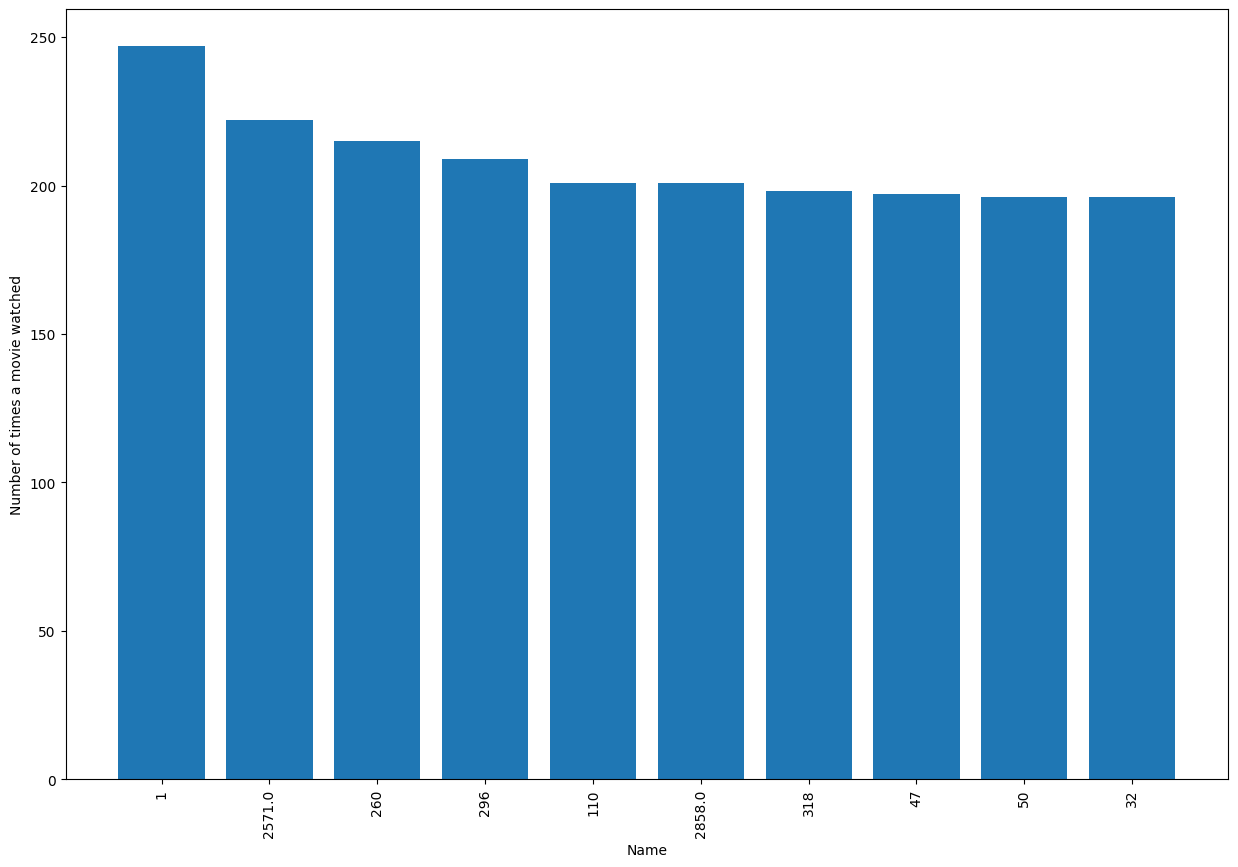

In [177]:
import matplotlib.pyplot as plt

x = top10.head(10).index.values
y = top10.head(10).values
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation='vertical')
plt.ylabel('Number of times a movie watched')
plt.xlabel('Name')
plt.show()

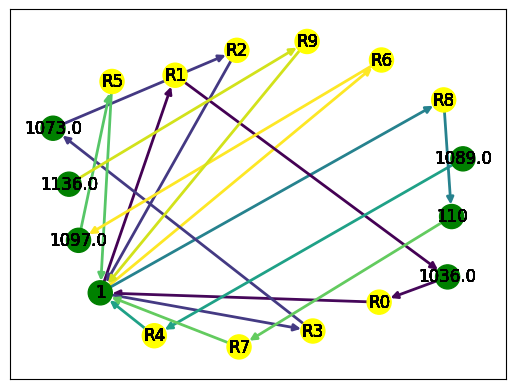

In [178]:
import networkx as nx
import matplotlib.pyplot as plt  
import numpy as np

def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    for i in range(rules_to_show):
        G1.add_nodes_from(["R"+str(i)])
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       

    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw_networkx(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16, 
            with_labels=False)            

    for p in pos:  # raise text positions
        nx.draw_networkx_labels(G1, pos)
        

draw_graph(rules_mlxtend, 10) 